In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import OneClassSVM
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Feature Engineering and Feature Selection

1. Label encoding
2. Imbalanced data - where the ratio between the observations of a binary variable is equal to or less than 20% then the data should be balanced
3. Implement unsupervised models to check whether the model identifies clusters in a distinct manner.
4. Feature selection

In [3]:
df = pd.read_pickle("/Users/mortzabari/Desktop/Mor/Academic/Data Science Course/Jupiter Notebooks/final project/CancerData_After_DataCleansing.pkl")
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Label Encoding:
There are many methods to encode a feature in the dataset. For example: using LabelEncoder, One-Hot Encoder or manually encoding.
It this case the column we want to encode is the target column and is a binary variable with two values ​​'M' or 'B'.
Lest's figure out what is the best encoding method for this variable:

- LabelEncoer: Converts each category into a unique integer (e.g., 0 and 1).
  This method is efficient for binary variables because it requires only one column and minimal computation. It’s straightforward and   doesn't introduce unnecessary complexity.
- One-Hot Encoding: Converts each category into a separate binary column (e.g., one column for 0, another for 1).
  This method is more commonly used for categorical variables with multiple categories. However, for a binary column, it’s less efficient   because it introduces an extra column that isn't necessary.
- Manual Encoding: Manually assigns 0 or 1 to each category.
  In terms of efficiency it is similar to Label Encoding, but it requires extra code and can be prone to error if not handled carefully.

So the most efficient encoding method is Label Encoding.
After the encoding all observations that were 'M' will become 1 and all observations that were 'B' will become 0.

In [5]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Imbalanced Data

Compute percentages of diagnosis values

,diagnosis,count
Benign,0,357
Malignant,1,212


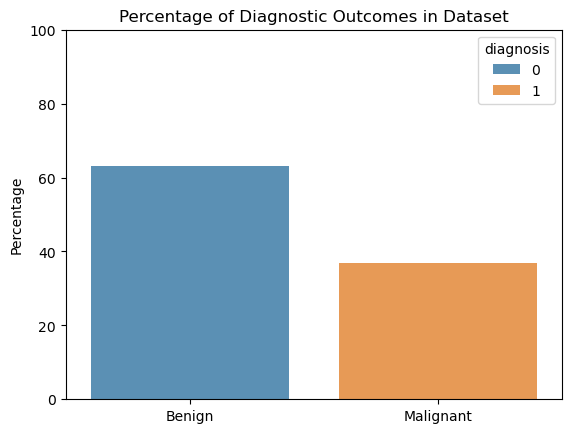

In [7]:
target = df['diagnosis'].value_counts() 
target = pd.Series(target)
target = pd.DataFrame(target)
target.reset_index(inplace = True)
target.index = ['Benign', 'Malignant']
display(target)

target['Percent'] = target['count']/sum(target['count'])*100
target['Percent'] = target['Percent'].round().astype('int')
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = target, alpha = .8, hue='diagnosis')
plt.title('Percentage of Diagnostic Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()


In the graph above we see the ratio between the values ​​in the target column, there are approximately 60% of observations that receive the value 0 compared to approximately 40% with the value 1. Therefore, it can be said that the dataset is balanced and there is no need to perform operations on it to balance it.

### Unsupervised Model

#### K-Means

In [11]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'AUC': metrics.roc_auc_score(y,yhat),
           'Silhouette': metrics.silhouette_score(pd.DataFrame(y), yhat)
          }
    return res

models_list = pd.DataFrame()

In [12]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

,model,Accuracy,Precision,Recall,f1-score,AUC,Silhouette
0,K-Means,0.14587,0.187215,0.386792,0.252308,0.194797,0.589474


Actual,0,1,Total
Pred,,,
0,1,356,357
1,130,82,212
Total,131,438,569


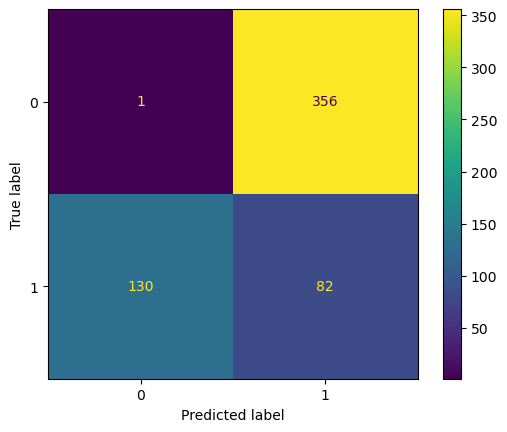

In [13]:
kmodel = KMeans(n_clusters=2, random_state=1).fit(X)
labels = kmodel.predict(X)

model_dict = {'model': "K-Means"}
combined_dict = {**model_dict, **classificationMetrics(y, labels)}
models_list = pd.DataFrame([combined_dict])
display(models_list)

display(pd.crosstab(y, labels ,rownames=['Pred'], colnames=['Actual'], margins=True, margins_name="Total"))

cmat=metrics.confusion_matrix(y,labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat)
cm_display.plot()
plt.show()

**Explanation**:
- Actual 0, Predicted 0 (Top-left, value = 1): This represents true negatives (TN). The model predicted 0, and the actual value was also 0. The model correctly identified **1** instance as 0.
- Actual 1, Predicted 0 (Top-right, value = 356): This represents false negatives (FN). The model predicted 0, but the actual value was 1. There were **356** instances where the model incorrectly predicted 0 instead of 1.
- Actual 0, Predicted 1 (Bottom-left, value = 130): This represents false positives (FP). The model predicted 1, but the actual value was 0. There were **130** instances where the model incorrectly predicted 1 instead of 0.
- Actual 1, Predicted 1 (Bottom-right, value = 82): This represents true positives (TP). The model predicted 1, and the actual value was also 1. The model correctly identified **82** instances as 1.

**Conclusion**:

The model is not accurate enough in its predictions. It recognized many cases as positive when actually was negative and vice versa. Something that is very critical and even life-threatening when it comes to medical cases, especially cancer.
In addition, the model's accuracy is quite low, around 14.5%. Also, the precision and recall for predicting class 1 are also low, indicating that the model struggles to correctly identify the positive class (class 1).

#### GaussianMixture

,model,Accuracy,Precision,Recall,f1-score,AUC,Silhouette
0,K-Means,0.145870,0.187215,0.386792,0.252308,0.194797,0.589474
1,GaussianMixture,0.049209,0.046832,0.080189,0.059130,0.055501,0.854743


Actual,0,1,Total
Pred,,,
0,11,346,357
1,195,17,212
Total,206,363,569


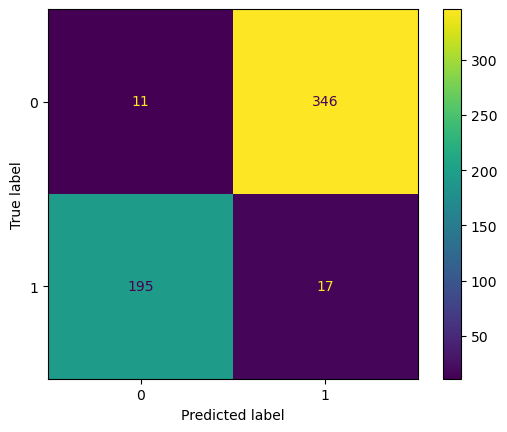

In [16]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)

model_dict = {'model': "GaussianMixture"}
combined_dict = {**model_dict, **classificationMetrics(y, gmm_labels)}
new_model_res = pd.DataFrame([combined_dict])
models_list = pd.concat([models_list, new_model_res], ignore_index=True)
display(models_list)

display(pd.crosstab(y, gmm_labels ,rownames=['Pred'], colnames=['Actual'], margins=True, margins_name="Total"))

cmat=metrics.confusion_matrix(y,gmm_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat)
cm_display.plot()
plt.show()

**Explanation**:
- Actual 0, Predicted 0 (Top-left, value = 11): This represents true negatives (TN). The model predicted 0, and the actual value was also 0. The model correctly identified **11** instance as 0.
- Actual 1, Predicted 0 (Top-right, value = 346): This represents false negatives (FN). The model predicted 0, but the actual value was 1. There were **346** instances where the model incorrectly predicted 0 instead of 1.
- Actual 0, Predicted 1 (Bottom-left, value = 195): This represents false positives (FP). The model predicted 1, but the actual value was 0. There were **195** instances where the model incorrectly predicted 1 instead of 0.
- Actual 1, Predicted 1 (Bottom-right, value = 17): This represents true positives (TP). The model predicted 1, and the actual value was also 1. The model correctly identified **17** instances as 1.

**Conclusion**:

The Gaussian Mixture model's performance on this dataset is significantly lower compared to the K-Means model. The confusion matrix shows that the model has a high number of false positives (195) and false negatives (346), indicating poor performance in distinguishing between the two classes.

*Accuracy*: The model's accuracy is very low at around 4.9%, indicating that it fails to correctly classify the majority of instances.

*Precision and Recall*: Both precision (0.0468) and recall (0.0802) are extremely low, particularly for class 1, which suggests that the model is unable to effectively identify true positive cases.

*f1-score*: The f1-score of 0.0591 reflects the poor balance between precision and recall, further emphasizing the model's inadequacy.

*AUC*: The Area Under the Curve (AUC) is very low at 0.0555, indicating that the model has almost no ability to distinguish between the classes.

*Silhouette Score*: Despite a higher silhouette score (0.8547), which might suggest well-defined clusters, the actual prediction quality is poor, highlighting that the clusters found by the Gaussian Mixture model do not correspond well to the actual class labels.

Given the critical nature of medical data, this model is not reliable for predicting cancer diagnoses. The high rate of misclassifications (both false positives and false negatives) makes this approach unsuitable for practical applications in this context.

### Feature Selection

#### Multivariable Analysis

In [56]:
# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingClassifier().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestClassifier().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

ridge = Ridge(alpha=0.5).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

logistic = LogisticRegression(max_iter=1000, C=1, penalty='l1', solver='liblinear').fit(X, y)
logistic_selected = (np.abs(logistic.coef_[0]) > 0).astype(int)

linear = LinearRegression().fit(X, y)
linear_selected = (np.abs(linear.coef_) > 0).astype(int)

adaboost = AdaBoostRegressor().fit(X, y)
adaboost_selected = (adaboost.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected,
    'LogisticRegression': logistic_selected,
    'LinearRegression': linear_selected,
    'AdaBoost': adaboost_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest', 'Ridge', 'LogisticRegression', 'LinearRegression', 'AdaBoost']].sum(axis=1)

# Output the results
display(selection_df)

,Feature,Lasso,SVM,GradientBoost,RandomForest,Ridge,LogisticRegression,LinearRegression,AdaBoost,Sum
0,radius_mean,0,0,1,1,1,1,1,1,6
1,texture_mean,1,0,1,1,1,1,1,1,7
2,perimeter_mean,0,1,1,1,1,1,1,1,7
3,area_mean,1,1,1,1,1,1,1,1,8
4,smoothness_mean,0,0,1,1,1,0,1,1,5
5,compactness_mean,0,0,1,1,1,0,1,1,5
6,concavity_mean,0,0,1,1,1,0,1,1,5
7,concave points_mean,0,0,1,1,1,0,1,1,5
8,symmetry_mean,0,0,1,1,1,0,1,1,5
9,fractal_dimension_mean,0,0,1,1,1,0,1,1,5


This dataset is considered a relatively small, 30 columns of data not including the target column.
Therefore, I will choose that the minimum value obtained in Multivariable Analysis will be the number according to which I will filter the most important and valuable characteristics for prediction, meaning that all features will be relevant and considered for prediction.

In [58]:
 #Selecting variables with a sum of selections >= 5
final_var = selection_df[selection_df['Sum'] >= 5]['Feature'].tolist()
df_model = df[final_var].copy()
df_model['diagnosis'] = df['diagnosis'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
df_model.to_pickle('CancerData_After_FeatureSelection.pkl')